In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
import geojson


Análisis Exploratorio de Datos (EDA)

In [5]:
eda= pd.read_csv("../Datasets/Siniestro_viales_limpio.csv")

Observación de los datos ingestados

In [121]:
eda

,Id,Fecha,Año,Mes,Día,Día_Semana,Hora completa,Hora,Numero_víctimas,Participantes,...,Calle,Cruce,Dirección normalizada,Comuna,Barrios,Coordenada_x,Coordenada_y,Pos x,Pos y,Semestre
0,2016-0001,2016-01-01,2016,1,1,Viernes,04:00:00,4,1,MOTO-AUTO,...,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,98896.782384,93532.434378,-58.475340,-34.687570,2016-1
1,2016-0002,2016-01-02,2016,1,2,Sabado,01:15:00,1,1,AUTO-PASAJEROS,...,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,LINIERS - MATADEROS - PARQUE AVELLANEDA,95832.055711,95505.416420,-58.508775,-34.669777,2016-1
2,2016-0003,2016-01-03,2016,1,3,Domingo,07:00:00,7,1,MOTO-AUTO,...,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,106684.290900,99706.576878,-58.390403,-34.631894,2016-1
3,2016-0004,2016-01-10,2016,1,10,Domingo,00:00:00,0,1,MOTO-SD,...,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,99840.652248,94269.165344,-58.465039,-34.680930,2016-1
4,2016-0005,2016-01-21,2016,1,21,Jueves,05:20:00,5,1,MOTO-PASAJEROS,...,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,106980.328279,100752.169158,-58.387183,-34.622466,2016-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,Domingo,06:20:00,6,1,PEATON-AUTO,...,RIVADAVIA AV.,PUEYRREDON AV.,RIVADAVIA AV. y PUEYRREDON AV.,3,BALVANERA - SAN CRISTOBAL,105258.353686,102122.932314,-58.405969,-34.610120,2021-2
713,2021-0093,2021-12-13,2021,12,13,Lunes,17:10:00,17,1,MOTO-AUTO,...,RIESTRA AV.,MOM,RIESTRA AV. y MOM,7,FLORES - PARQUE CHACABUCO,102728.600901,98186.249292,-58.433538,-34.645616,2021-2
714,2021-0094,2021-12-20,2021,12,20,Lunes,01:10:00,1,1,MOTO-AUTO,...,"DELLEPIANE, LUIS, TTE. GRAL.",LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,LINIERS - MATADEROS - PARQUE AVELLANEDA,99624.297958,97569.698011,-58.467398,-34.651178,2021-2
715,2021-0095,2021-12-30,2021,12,30,Jueves,00:43:00,0,1,MOTO-CARGAS,...,GAONA AV.,TERRADA,GAONA AV. y TERRADA,11,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,99116.454924,101045.232848,-58.472934,-34.619847,2021-2


In [7]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     717 non-null    object 
 1   Fecha                  702 non-null    object 
 2   Año                    702 non-null    float64
 3   Mes                    717 non-null    int64  
 4   Día                    717 non-null    int64  
 5   Día_Semana             702 non-null    object 
 6   Hora completa          702 non-null    object 
 7   Hora                   701 non-null    float64
 8   Numero_víctimas        717 non-null    int64  
 9   Participantes          702 non-null    object 
 10  Rol                    717 non-null    object 
 11  Acusado                702 non-null    object 
 12  Victima                702 non-null    object 
 13  Sexo                   717 non-null    object 
 14  Edad                   664 non-null    float64
 15  Rango_

Modificación de los tipos de datos Float a Entero de las columnas 'Edad' y 'Hora' 

In [10]:
eda["Edad"] = eda["Edad"].fillna(0.0)
eda["Edad"] = eda["Edad"].astype ("Int64")

eda["Hora"] = eda["Hora"].fillna(0.0)
eda["Hora"] = eda["Hora"].astype ("Int64")

eda["Año"] = eda["Año"].fillna(0.0)
eda["Año"] = eda["Año"].astype ("Int64")



In [11]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     717 non-null    object 
 1   Fecha                  702 non-null    object 
 2   Año                    717 non-null    Int64  
 3   Mes                    717 non-null    int64  
 4   Día                    717 non-null    int64  
 5   Día_Semana             702 non-null    object 
 6   Hora completa          702 non-null    object 
 7   Hora                   717 non-null    Int64  
 8   Numero_víctimas        717 non-null    int64  
 9   Participantes          702 non-null    object 
 10  Rol                    717 non-null    object 
 11  Acusado                702 non-null    object 
 12  Victima                702 non-null    object 
 13  Sexo                   717 non-null    object 
 14  Edad                   717 non-null    Int64  
 15  Rango_

Se lleva a cabo un análisis en busca de valores atípicos en el DataFrame para evaluar si es necesario eliminarlos o conservarlos.

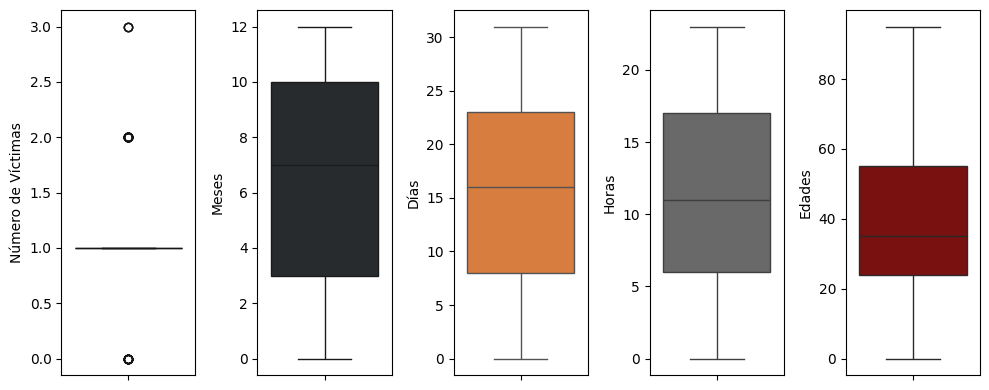

In [22]:
# Ajuste del tamaño de la figura
plt.figure(figsize=(10, 4))

# Creación de subplots para los gráficos 
plt.subplot(1, 5, 1) 
sns.boxplot(data=eda, y='Numero_víctimas', color = "#212529")
plt.ylabel('Número de Víctimas')

plt.subplot(1, 5, 2) 
sns.boxplot(data=eda, y='Mes', color = "#272b2f")
plt.ylabel('Meses')

plt.subplot(1, 5, 3) 
sns.boxplot(data=eda, y='Día', color = "#F17925")
plt.ylabel('Días')

plt.subplot(1, 5, 4) 
sns.boxplot(data=eda, y='Hora', color = "#696969")
plt.ylabel('Horas')

plt.subplot(1, 5, 5) 
sns.boxplot(data=eda, y='Edad', color = "#8B0000")
plt.ylabel('Edades')

# Ajuste del espaciado entre subplots
plt.tight_layout()

plt.show()

Los valores atípicos identificados en la columna 'Numero_víctimas' son 2 y 3. Esto se debe a que la mayoría de los casos registran solo una víctima en los siniestros

Análisis de la cantidad de víctimas en siniestros viales por mes 

In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
import geojson


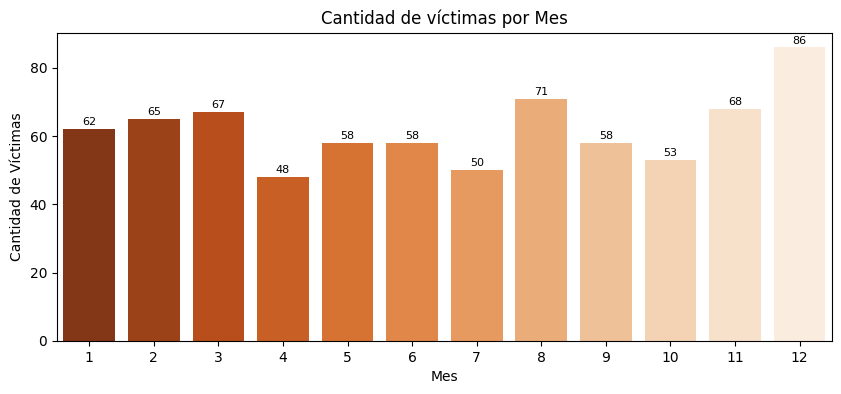

In [52]:

# Se agrupa por la cantidad de víctimas por mes
data = eda.groupby(['Mes'])['Numero_víctimas'].sum().reset_index()
data = data.drop(data.index[0])

# Obtener la paleta de colores invertida
palette = sns.color_palette("Oranges", len(data))
palette = palette[::-1]  # Invertir la paleta

# Se genera el gráfico
plt.figure(figsize=(10,4))
ax = sns.barplot(x='Mes', y='Numero_víctimas', hue='Mes', data=data, palette=palette, legend=False)
ax.set_title('Cantidad de víctimas por Mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de Víctimas')

# Se agregan etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()

Se observa que el mes con la mayor cantidad de víctimas en siniestros viales es Diciembre

Análisis de la cantidad de víctimas en siniestros viales por Día

C:\Users\Lenovo G40 80\AppData\Local\Temp\ipykernel_2746376\642358050.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Día', y='Numero_víctimas', data=data1, palette=palette)


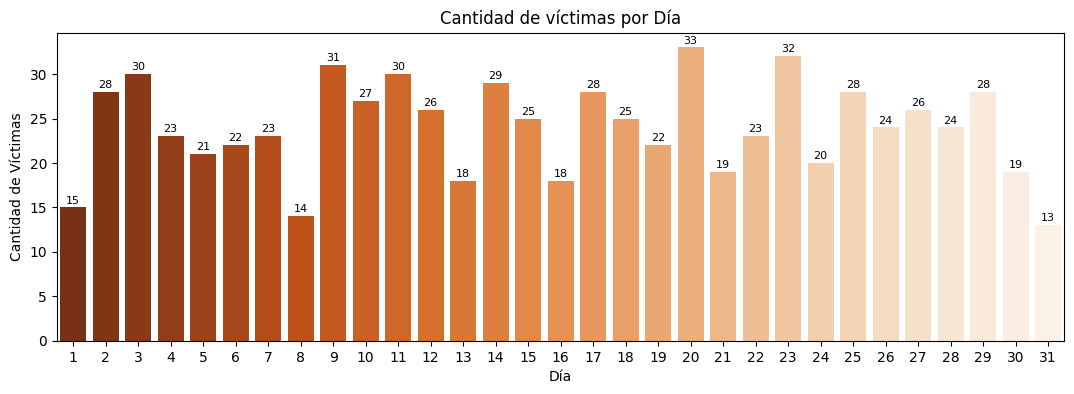

In [53]:
# Se agrupa por la cantidad de víctimas por día
data1 = eda.groupby(['Día'])['Numero_víctimas'].sum().reset_index()
data1 = data1.drop(data1.index[0])
palette = sns.color_palette("Oranges", len(data1))
palette = palette[::-1]  # Invertir la paleta

# Generación del gráfico
plt.figure(figsize=(13, 4))
ax = sns.barplot(x='Día', y='Numero_víctimas', data=data1, palette=palette)

# Configuraciones adicionales
ax.set_title('Cantidad de víctimas por Día')
ax.set_xlabel('Día')
ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
import geojson


Análisis sobre la cantidad de víctimas en siniestros viales por Día de Semana

C:\Users\Lenovo G40 80\AppData\Local\Temp\ipykernel_2746376\1853894953.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Día_Semana', y='Numero_víctimas', data=data2, palette=palette)


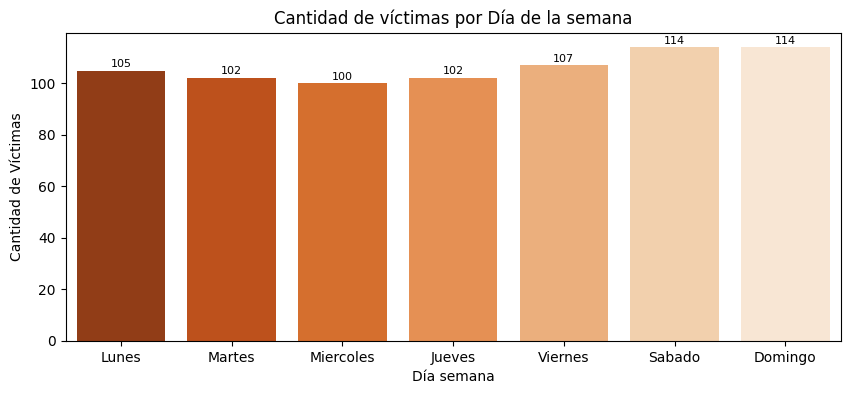

In [58]:
# Se agrupa la cantidad de víctimas por día de semana
data2 = eda.groupby(['Día_Semana'])['Numero_víctimas'].sum().reset_index()

# Luego se ordenan los días de la semana
orden_dias_semana = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]

# Se crea una columna 'Orden_dia_semana' en el DataFrame para representar el orden numérico de los días de la semana
data2['Orden_dia_semana'] = data2['Día_Semana'].apply(lambda x: orden_dias_semana.index(x))

# Por último, se ordena el DataFrame según el orden numérico de los días de la semana
data2 = data2.sort_values(by='Orden_dia_semana')

# Obtener la paleta de colores invertida
palette = sns.color_palette("Oranges", len(data2))
palette = palette[::-1]  # Invertir la paleta

# Se grafica
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Día_Semana', y='Numero_víctimas', data=data2, palette=palette)
ax.set_title('Cantidad de víctimas por Día de la semana')
ax.set_xlabel('Día semana')
ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()

Se puede observar que los días Sábado y Domingo son los que registran la mayor cantidad de víctimas en siniestros viales. Esto se puede relacionar con la ajetreada actividad nocturna que se intensifica especialmente durante los fines de semana

Análisis sobre la cantidad de víctimas en siniestros viales por Año

C:\Users\Lenovo G40 80\AppData\Local\Temp\ipykernel_2746376\3705177622.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Año', y='Numero_víctimas', data=data3, palette=palette)
C:\Users\Lenovo G40 80\AppData\Local\Temp\ipykernel_2746376\3705177622.py:15: UserWarning: The palette list has more values (31) than needed (6), which may not be intended.
  ax = sns.barplot(x='Año', y='Numero_víctimas', data=data3, palette=palette)


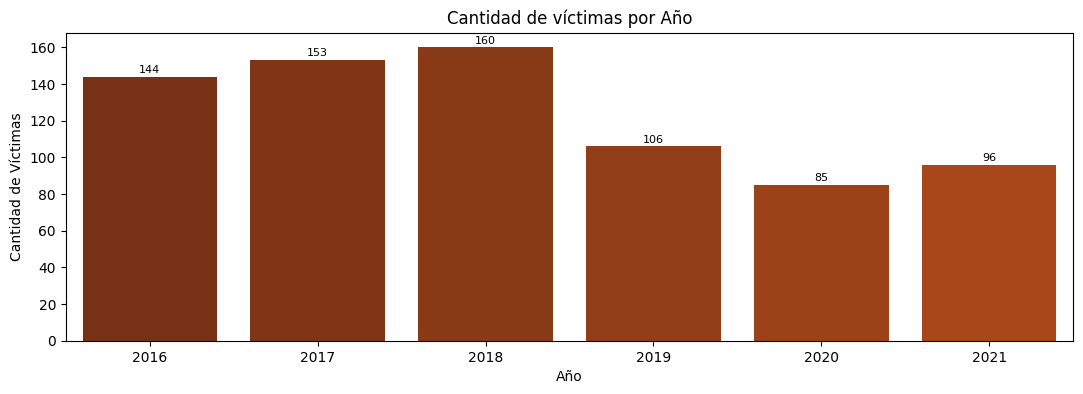

In [230]:

# Se agrupa por la cantidad de víctimas por día
data1 = eda.groupby(['Día'])['Numero_víctimas'].sum().reset_index()
data1 = data1.drop(data1.index[0])

# Obtener la paleta de colores invertida
palette = sns.color_palette("Oranges", len(data1))
palette = palette[::-1]  # Invertir la paleta

# Se agrupa por la cantidad de víctimas por año
data3 = eda.groupby(['Año'])['Numero_víctimas'].sum().reset_index()
data3 = data3.drop(data3.index[0])

# Se genera el gráfico
plt.figure(figsize=(13, 4))
ax = sns.barplot(x='Año', y='Numero_víctimas', data=data3, palette=palette)
ax.set_title('Cantidad de víctimas por Año')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

C:\Users\Lenovo G40 80\AppData\Local\Temp\ipykernel_2746376\558465010.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Año', y='Numero_víctimas', data=data3, palette=palette)


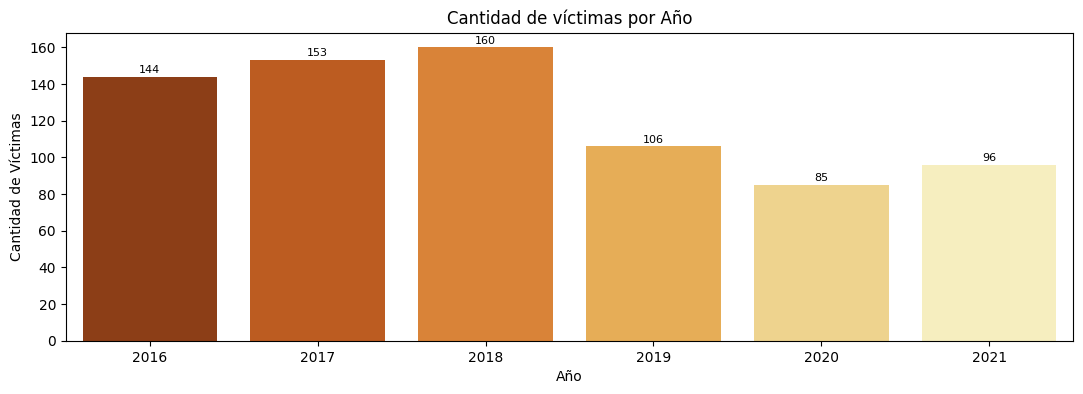

In [232]:
# Se agrupa por la cantidad de víctimas por año
data3 = eda.groupby(['Año'])['Numero_víctimas'].sum().reset_index()
data3 = data3.drop(data3.index[0])

# Se genera el gráfico
plt.figure(figsize=(13, 4))

# Definir una paleta de colores personalizada con más variación
palette = sns.color_palette("YlOrBr", n_colors=len(data3))
# Invertir el orden de la paleta de colores
palette = palette[::-1]

ax = sns.barplot(x='Año', y='Numero_víctimas', data=data3, palette=palette)
ax.set_title('Cantidad de víctimas por Año')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()


Se puede observar que hubo un pico de victimas de siniestros viales en el año 2018. Asimismo, se puede observar también que en el año 2020 disminuyó considerablemente. Esto se puede relacionar con la declaración de la pandemia mundial y las restricciones de viaje y movilidad impuestas

Análisis de edad de las víctimas de siniestros viales por año

C:\Users\Lenovo G40 80\AppData\Local\Temp\ipykernel_2746376\2952972770.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Año', y='Edad', data=data4, palette=palette)


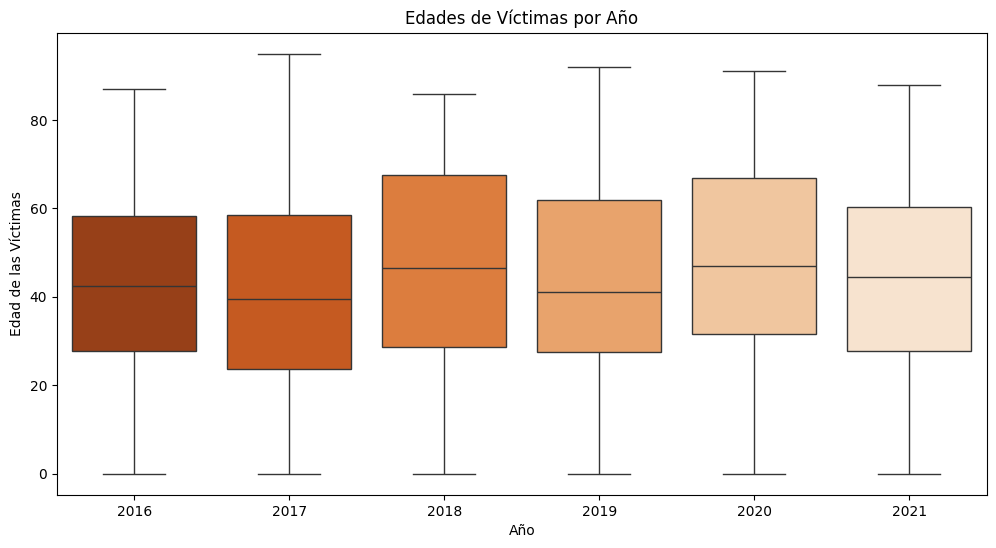

In [64]:
# Se agrupa la cantidad de víctimas por edad y año
data4 = eda.groupby(['Edad', 'Año'])['Numero_víctimas'].sum().reset_index()
data4 = data4.drop(data4.index[0])
data4 = data4.loc[~((data4['Año'] == 0) & (data4['Numero_víctimas'] == 0))]

# Obtener la paleta de colores invertida
palette = sns.color_palette("Oranges", len(data4['Año'].unique()))
palette = palette[::-1]  # Invertir la paleta

# Se crea el gráfico de boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Año', y='Edad', data=data4, palette=palette)

plt.title('Edades de Víctimas por Año')
plt.xlabel('Año')
plt.ylabel('Edad de las Víctimas')

# Se muestra el gráfico
plt.show()

Se puede observar que desde el año 2016 hasta el año 2021, la mediana de la edad de las víctimas de siniestros viales se mantiene entre los 40 y los 45 años.



Análisis de los participantes en los Siniestros viales

C:\Users\Lenovo G40 80\AppData\Local\Temp\ipykernel_2746376\274114883.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(eda, x="Participantes", palette=custom_palette)
C:\Users\Lenovo G40 80\AppData\Local\Temp\ipykernel_2746376\274114883.py:9: UserWarning: 
The palette list has fewer values (18) than needed (41) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(eda, x="Participantes", palette=custom_palette)


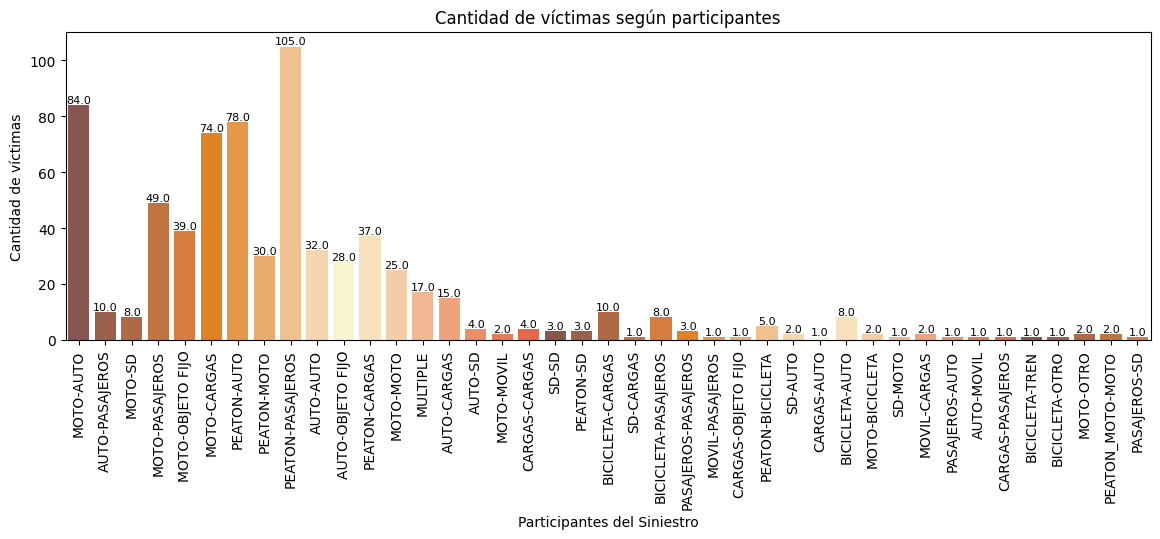

In [66]:
# Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

# Definir la paleta de colores personalizada y luego invertirla
custom_palette = ["#FF5733", "#FF6F3C", "#FF8753", "#FF9E6B", "#FFB683", "#FFCD9B", "#FFE4B3", "#FFFBCB", "#FFD7A5", "#FFC27E",
                  "#FFAC58", "#FF972F", "#FF8105", "#F17925", "#D76E2D", "#BF6436", "#A85A3F", "#914F47"]
custom_palette = custom_palette[::-1]

ax = sns.countplot(eda, x="Participantes", palette=custom_palette)

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

# Se ubican los títulos de las barras en 90 grados
plt.xticks(rotation=90)

# Se titulan los ejes
plt.xlabel('Participantes del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según participantes')

plt.show()

Se puede observar que en la mayoría de la cantidad de víctimas en siniestros viales, las motos son los participantes principales.

Análisis de los acusados en los Siniestros viales

C:\Users\Lenovo G40 80\AppData\Local\Temp\ipykernel_2746376\2300994226.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=eda, x="Acusado", palette=palette)
C:\Users\Lenovo G40 80\AppData\Local\Temp\ipykernel_2746376\2300994226.py:7: UserWarning: The palette list has more values (11) than needed (10), which may not be intended.
  ax = sns.countplot(data=eda, x="Acusado", palette=palette)


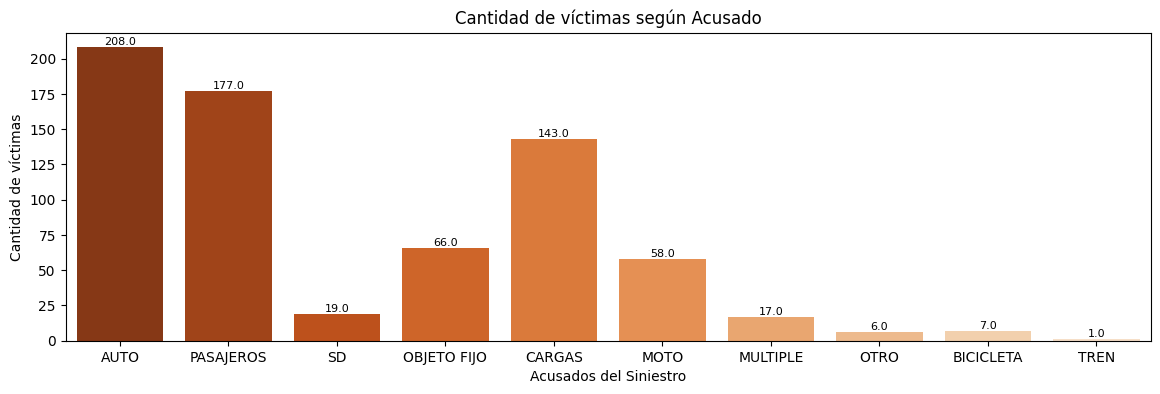

In [72]:
plt.figure(figsize=(14, 4))

# Obtener la paleta de colores invertida
palette = sns.color_palette("Oranges", len(eda['Acusado'].unique()))
palette = palette[::-1]  # Invertir la paleta

ax = sns.countplot(data=eda, x="Acusado", palette=palette)

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

# Se titulan los ejes y el gráfico
plt.xlabel('Acusados del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según Acusado')

plt.show()

Se puede observar que los autos junto con los pasajeron son los mayores acusados en relación a la cantidad de víctimas en siniestro viales. Según el diccionario de datos, pasajero es cualquier persona que se encuentra dentro, descendiendo o ascendiendo del transporte público u omnibús de larga distancia.

Análisis de las víctimas en los Siniestros viales

C:\Users\Lenovo G40 80\AppData\Local\Temp\ipykernel_2746376\3958496046.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=eda, x="Victima", palette=palette)
C:\Users\Lenovo G40 80\AppData\Local\Temp\ipykernel_2746376\3958496046.py:7: UserWarning: The palette list has more values (11) than needed (10), which may not be intended.
  ax = sns.countplot(data=eda, x="Victima", palette=palette)


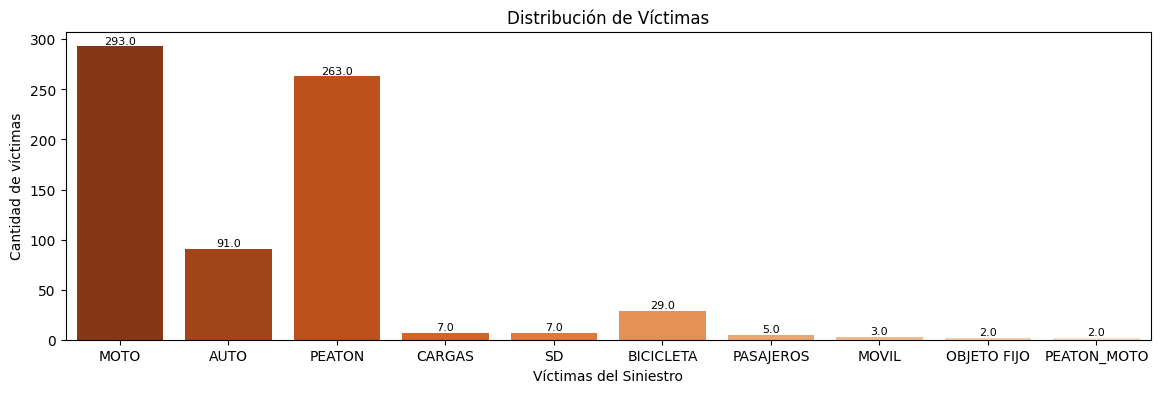

In [73]:
plt.figure(figsize=(14, 4))

# Obtener la paleta de colores invertida
palette = sns.color_palette("Oranges", len(eda['Victima'].unique()))
palette = palette[::-1]  # Invertir la paleta

ax = sns.countplot(data=eda, x="Victima", palette=palette)

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

# Se titulan los ejes y el gráfico
plt.xlabel('Víctimas del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Distribución de Víctimas')

plt.show()

Se puede observar en el gráfico que las motos, seguidas de los peatones, representan en su mayoría a las víctimas de los siniestros viales ocurridos 

Análisis de víctimas por sexo

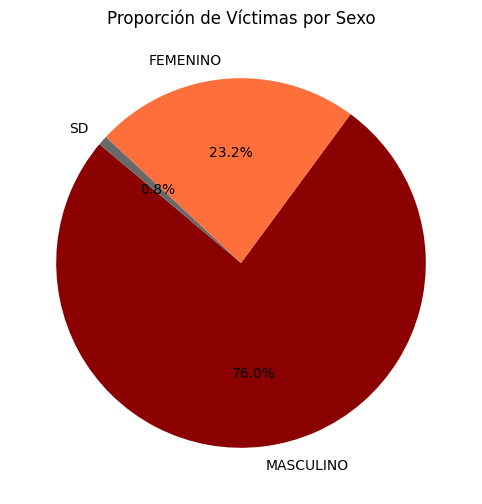

In [91]:
# Se calcula la cantidad de víctimas por sexo
cantidad = eda['Sexo'].value_counts(normalize=True) * 100

# Preparar los datos para el gráfico de torta
labels = cantidad.index
sizes = cantidad.values

# Crear el gráfico de torta
plt.figure(figsize=(12, 6))

# Obtener la paleta de colores
custom_palette = ["#8B0000", "#FF6F3C", "#696969"]  # Utilizando los mismos colores que los gráficos anteriores

# Gráfico de torta
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=custom_palette)
plt.title('Proporción de Víctimas por Sexo')

plt.show()

Se puede observar que el 76% de las víctimas de siniestros viales pertenecen al sexo masculino

Análisis de edad de víctimas de siniestros viales por sexo

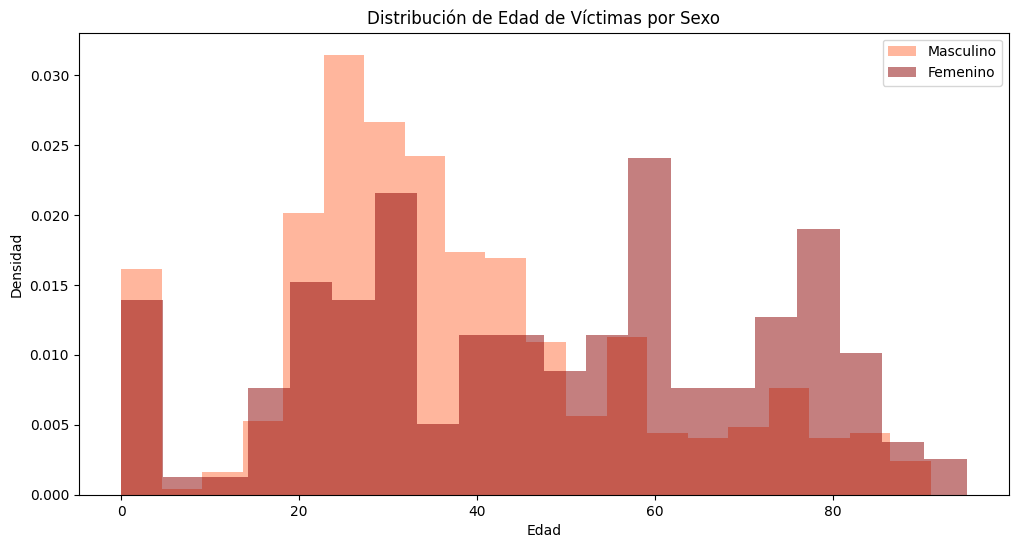

In [98]:
# Primero filtramos la edad de las víctimas por sexo masculino
Masculino = eda[eda['Sexo'] == 'MASCULINO']['Edad'].dropna()

# Luego las filtramos por sexo femenino
Femenino = eda[eda['Sexo'] == 'FEMENINO']['Edad'].dropna()

# se crea el histograma
plt.figure(figsize=(12, 6))
plt.hist(Masculino, bins=20, alpha=0.5, color='#FF6F3C', label='Masculino', density=True)
plt.hist(Femenino, bins=20, alpha=0.5, color='#8B0000', label='Femenino', density=True)
plt.title('Distribución de Edad de Víctimas por Sexo')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Se muestran dos histogramas sobre el mismo eje a fin de poder observar las diferencias entre las víctimas de ambos sexos.
Podemos apreciar que las victimas de siniestros viales del sexo Masculino tienen entre 20 a 40 años de edad, mientras que las víctimas de siniestros viales del sexo Femenino tienen entre 30, 60 y 80 años de edad.

Análisis de los roles de las víctimas de siniestros viales por sexo

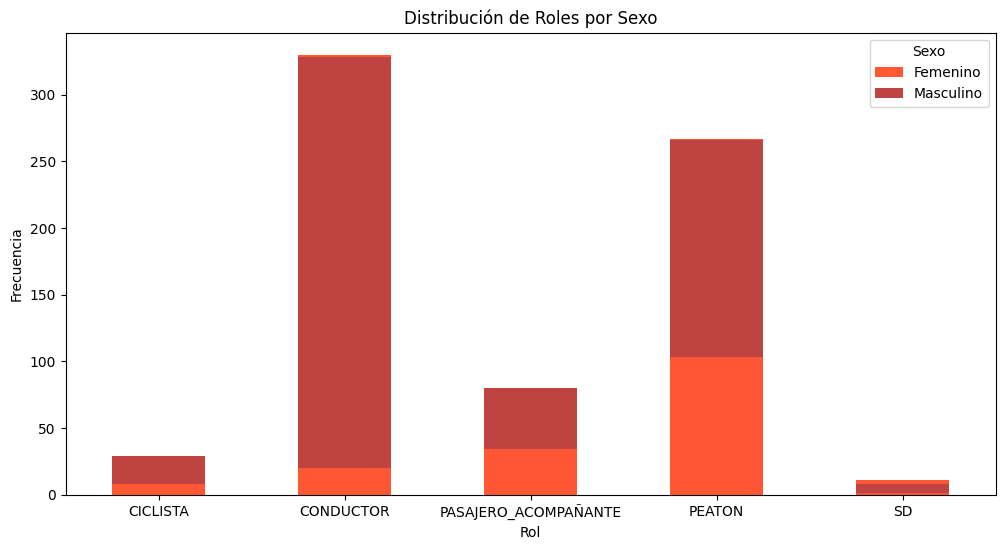

In [95]:
# Se crea una tabla de contingencia
tabla_contingencia = pd.crosstab(eda['Rol'], eda['Sexo'])

# Luego se crea un gráfico de barras apiladas
ax = tabla_contingencia.plot(kind='bar', stacked=True, figsize=(12, 6), color=["#FF5733", '#BF4340'])
plt.title('Distribución de Roles por Sexo')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')

# Agregar una leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

plt.xticks(rotation=0)
plt.show()

En el gráfico se puede observar que en los siniestros viales las victimas tienen como mayor rol Conductor, seguida por Peatón. El sexo masculino es el más frecuente para ambos roles. A su vez, el sexo femenino posee más frecuencia en el rol como peatón y como pasajero-acompañante.

Análisis de víctimas de siniestros viales por sexo y tipo de transporte

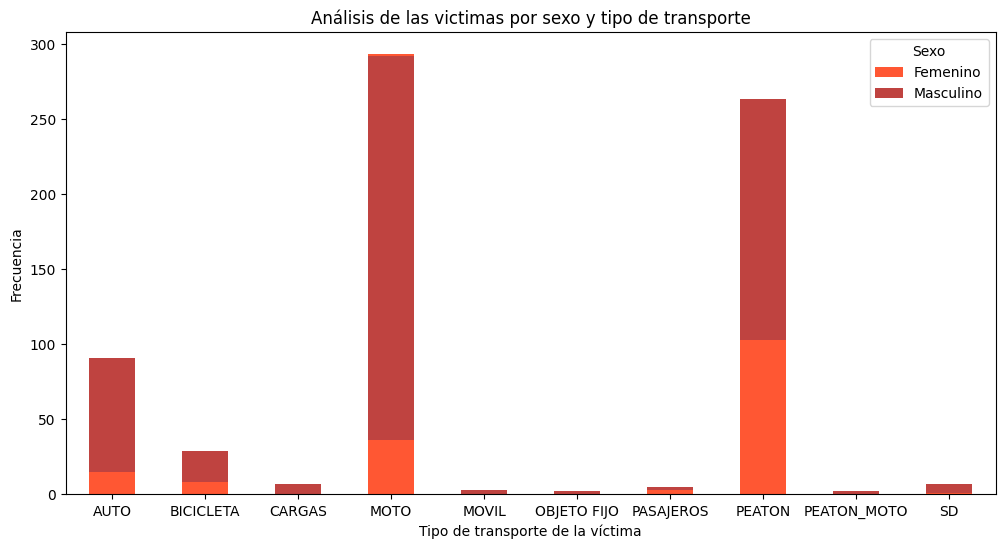

In [99]:
# Se crea una tabla de contingencia
tabla_contingencia = pd.crosstab(eda['Victima'], eda['Sexo'])

# Luego se crea un gráfico de barras apiladas
ax = tabla_contingencia.plot(kind='bar', stacked=True, figsize=(12, 6), color=["#FF5733", '#BF4340'])
plt.title('Análisis de las victimas por sexo y tipo de transporte')
plt.xlabel('Tipo de transporte de la víctima')
plt.ylabel('Frecuencia')

# Agregar una leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

plt.xticks(rotation=0)
plt.show()

Se puede apreciar en el gráfico que la mayor cantidad de víctimas en siniestros viales utilizan como transporte la moto, adicionando que pertenecen al sexo masculino. Por otro lado, los peatones, son el segundo tipo de víctima, en el que la mayor cantidad también son del sexo masculino pero con un aumento de cantidad del sexo femenino.

Análisis de la cantidad de víctimas en siniestros viales

C:\Users\Lenovo G40 80\AppData\Local\Temp\ipykernel_2746376\1836376033.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data5, x='Numero_víctimas', palette=custom_palette)


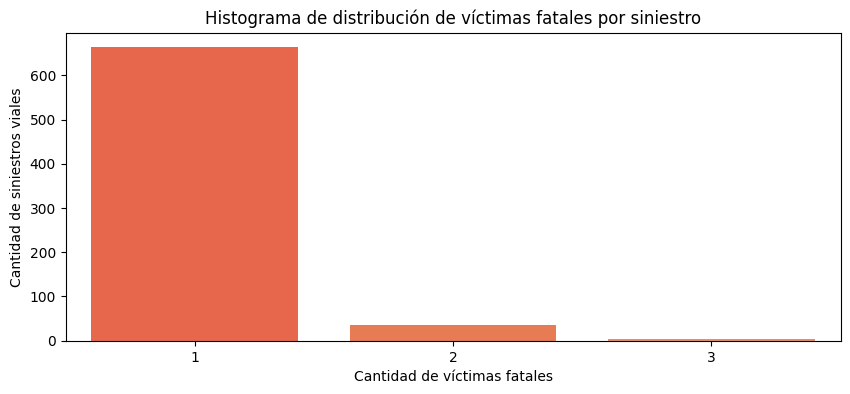

In [104]:
plt.figure(figsize=(10, 4))

data5 = eda[eda["Numero_víctimas"] != 0]

# Se define la paleta de colores en tonos de naranja
custom_palette = ["#FF5733", "#FF6F3C", "#FF8753", ]

# Se genera el gráfico

# Se cuentan los datos de la columna y se calcula la frecuencia en que se distribuye
sns.countplot(data5, x='Numero_víctimas', palette=custom_palette)

plt.ylabel("Cantidad de siniestros viales")
plt.xlabel("Cantidad de víctimas fatales")
plt.title("Histograma de distribución de víctimas fatales por siniestro")

plt.show()

Se puede observar que en la mayoría de los siniestros viales, la cantidad de víctimas es de 1 (una), siendo 2 y 3 las cantidades de victimas con porcentajes relativamente bajos

Análisis de víctimas de siniestros viales por día de semana y hora

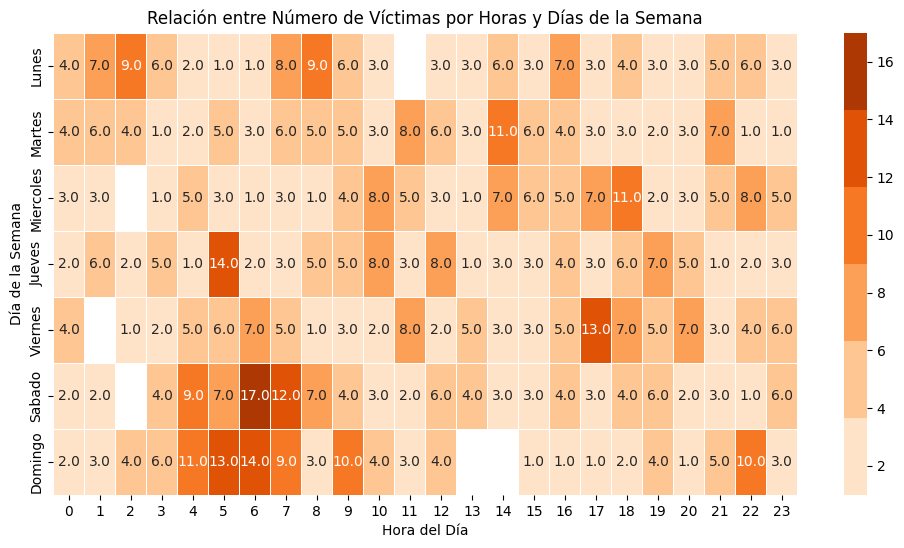

In [107]:

# Se agrupa los datos en cantidad de víctimas por día de la semana y horas
data6 = eda.groupby(['Día_Semana', "Hora"])['Numero_víctimas'].sum().reset_index()

# Luego se define el orden de los días de la semana
orden_dias_semana = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]

# Se crea una columna llamada 'Orden_dia_semana' en el DataFrame para representar el orden numérico de los días de la semana
data6['Orden_dia_semana'] = data6['Día_Semana'].apply(lambda x: orden_dias_semana.index(x))

# Se ordena el DataFrame según el orden numérico de los días de la semana
data6 = data6.sort_values(by='Orden_dia_semana')

# Se crea una tabla pivot para los datos
pivot_data6 = data6.pivot_table(index='Día_Semana', columns='Hora', values='Numero_víctimas', aggfunc='sum')
pivot_data6 = pivot_data6.reindex(orden_dias_semana)

# Se crea un mapa de calor (heatmap)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data6, cmap=palette, annot=True, fmt='.1f', linewidths=0.5)

# Se colocan las etiquetas y el título 
plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana')
plt.title('Relación entre Número de Víctimas por Horas y Días de la Semana')

plt.show()

En el análisis del gráfico, se destaca que los días sábado y domingo muestran la mayor cantidad de víctimas en siniestros viales, concentrándose principalmente entre las 03:00 a.m. y las 09:00 a.m. Esta tendencia sugiere una mayor incidencia de accidentes durante las primeras horas del fin de semana. Además, en los días laborables, la distribución de siniestros muestra picos notables entre las 07:00 a.m. y las 09:00 a.m., coincidiendo con las horas de entrada al trabajo, y nuevamente entre las 16:00 p.m. y las 20:00 p.m., momento en el que suele haber una mayor actividad de salida de las jornadas laborales.

Se analiza la distribución espacial de las víctimas de siniestros viales usando Geopandas. Se establece un sistema de referencia de coordenadas (CRS), que indica a Python cómo estas coordenadas se relacionan con los lugares en el planeta. Esto es esencial para interpretar y visualizar correctamente los datos geoespaciales.

c:\Users\Lenovo G40 80\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

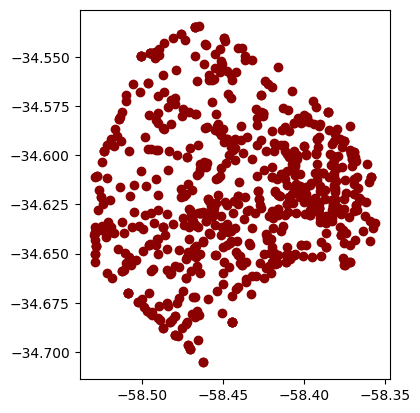

In [123]:
# Iniciamos CRS

crs={'init':'epsg:4326'}
#Definimos la geometría según nuestro dataset
geometry=[Point(xy) for xy in zip(eda["Pos x"], eda["Pos y"])]
#Ua vez que tenemos el sistema de referencia decoordenadas y la geometría; se procede a la carga de los datos
geodata=gpd.GeoDataFrame(eda,crs=crs, geometry=geometry)

#Se imprime el resultante que luego será introducido en un mapa
geodata.plot(color='#8B0000')

In [124]:
#Se extrae el archivo
shapefile = gpd.read_file("../Datasets/comunas_wgs84.shp")

Text(158.98305973900304, 0.5, 'Latitud')

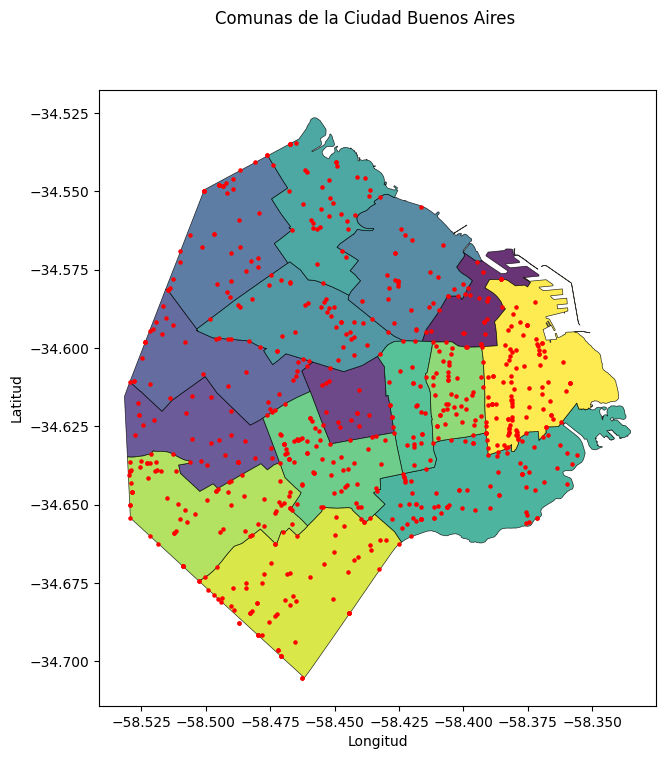

In [136]:
#Se realiza sobre el mapa de CABA la presentación de los puntos de referencia a los siniestros viales

fig, ax = plt.subplots(figsize=(10,8))

#Se dibuja el Shapefile
shapefile.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=0.8,linewidth=0.5,cmap="viridis")

#Se dibujan los datos geoespaciales
geodata.plot(ax=ax, color='red', markersize=5)

#Se agregan los títulos
fig.suptitle('Comunas de la Ciudad Buenos Aires', fontsize=12)
ax.set_xlabel('Longitud', fontsize=10)
ax.set_ylabel('Latitud', fontsize='medium')

Análisis de víctimas de siniestros viales por Comunas y Barrios

In [134]:
# Creamos un dataset con el número de víctimas por Barrio y Comuna
Total_comuna=eda.groupby(["Comuna", "Barrios"])["Numero_víctimas"].sum().reset_index()
Total_comuna=Total_comuna.sort_values(by="Numero_víctimas", ascending=False)
Total_comuna

,Comuna,Barrios,Numero_víctimas
0,1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,101
3,4,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...,81
8,9,LINIERS - MATADEROS - PARQUE AVELLANEDA,74
7,8,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,70
6,7,FLORES - PARQUE CHACABUCO,65
2,3,BALVANERA - SAN CRISTOBAL,48
14,15,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERN...,47
11,12,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,43
12,13,BELGRANO - COLEGIALES - NUÃ‘EZ,39
13,14,PALERMO,38


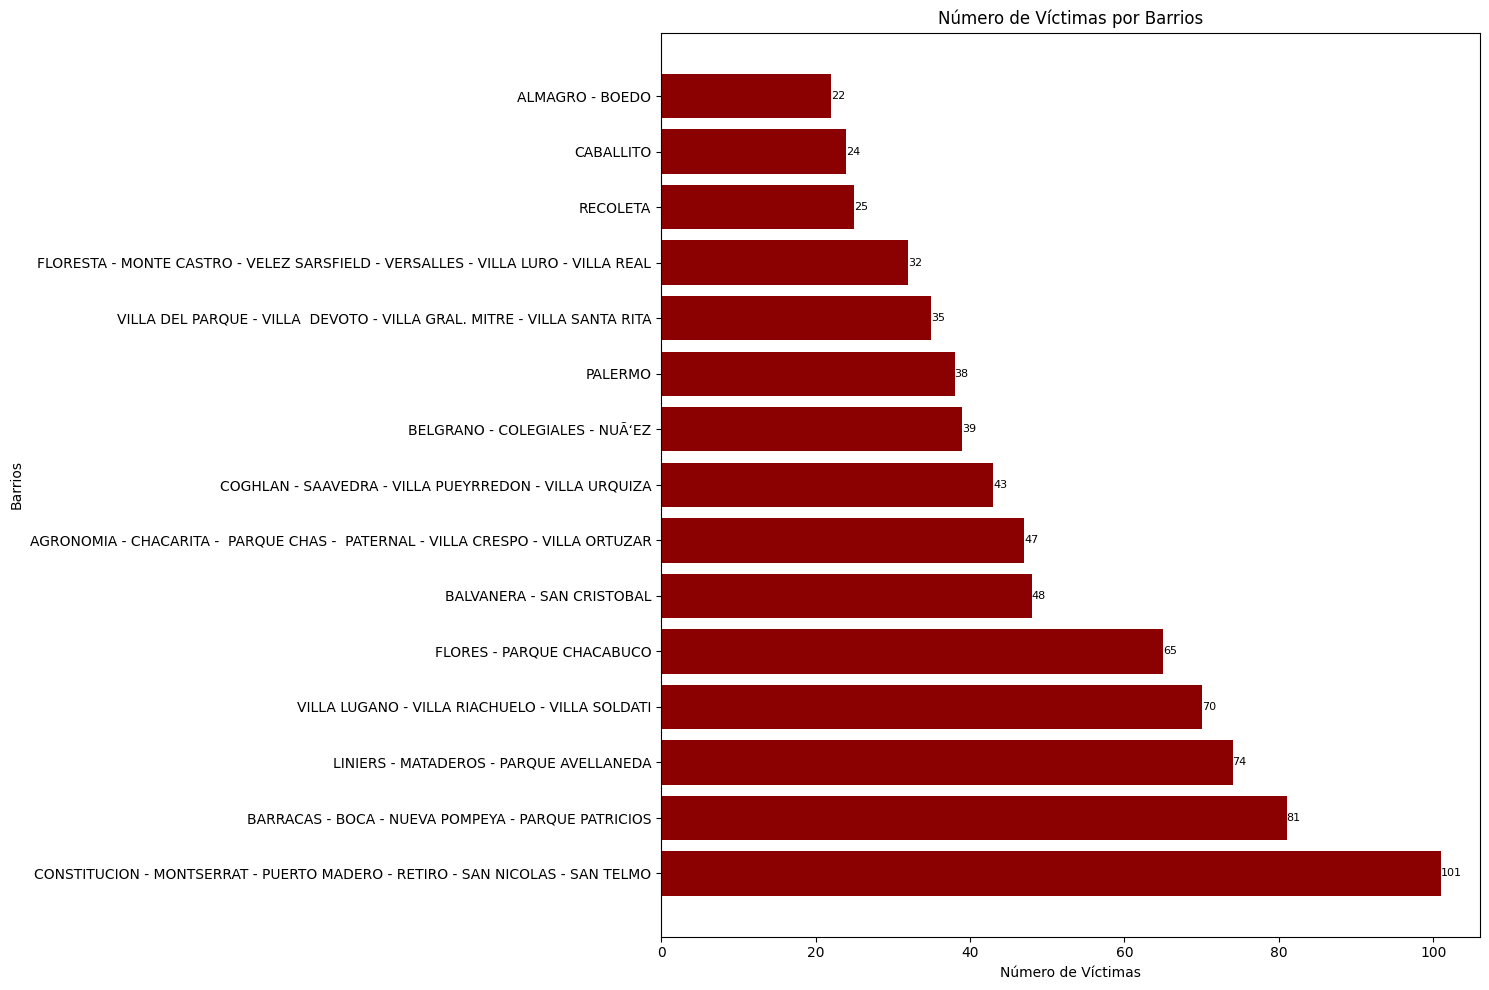

In [137]:
plt.figure(figsize=(15, 10))

# Color rojo medio bordó
color_grafico = '#8B0000'

# Se dibujan las barras horizontales con el color especificado
plt.barh(Total_comuna["Barrios"], Total_comuna["Numero_víctimas"], color=color_grafico)

plt.xlabel('Número de Víctimas')
plt.ylabel('Barrios')

# Título del gráfico
plt.title('Número de Víctimas por Barrios')

# Se agrega el número de víctimas sobre cada barra
for i, v in enumerate(Total_comuna["Numero_víctimas"]):
    plt.text(v, i, str(v), va='center', fontsize=8, color='black')

plt.tight_layout()
plt.show()

En el gráfico se pueden observar 15 comunas, conformadas con uno o varios Barrios. Las comunas con mayor cantidad de víctimas en siniestros viales son las 1, 4, 9, 8 y 7.
En la comuna 1 se encuentra el microcentro de la Ciudad Autónoma de Buenos Aires. Debido a la alta concentración de oficinas en esa zona, se puede presumir que el elevado número de víctimas mortales en accidentes de tráfico puede estar relacionado con el tráfico durante las horas de entrada o salida del trabajo

C:\Users\Lenovo G40 80\AppData\Local\Temp\ipykernel_2746376\1110974016.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=eda, x='Tipo_de_calle', palette=paleta_color)
C:\Users\Lenovo G40 80\AppData\Local\Temp\ipykernel_2746376\1110974016.py:4: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.countplot(data=eda, x='Tipo_de_calle', palette=paleta_color)


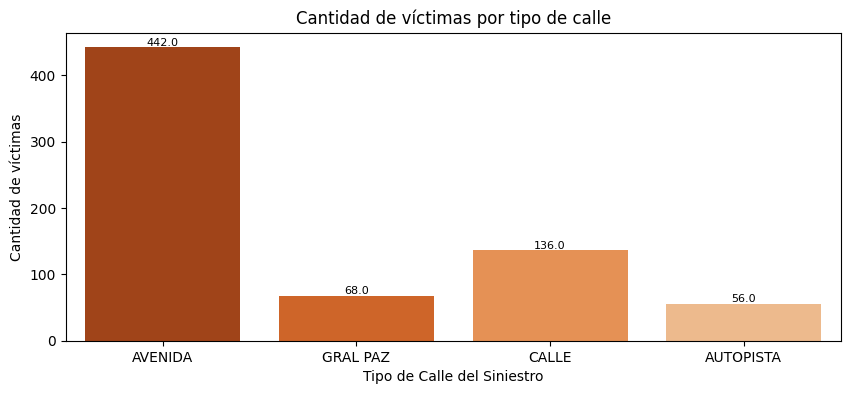

In [140]:
paleta_color = sns.color_palette("Oranges_r", len(eda["Tipo_de_calle"].unique()))
# Se crea el gráfico de barras
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=eda, x='Tipo_de_calle', palette=paleta_color)

# Se agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

# Se titulan los ejes
plt.xlabel('Tipo de Calle del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas por tipo de calle')

plt.show()

El gráfico muestra que la mayoría de las víctimas en accidentes de tráfico ocurren en avenidas, seguidas por las calles.


Conclusiones
De un total de 702 víctimas fatales, el 76% corresponde al sexo masculino, predominantemente en el rango de edad de 20 a 40 años. Además, el rol de conductor prevalece entre este grupo.
Las avenidas son los lugares con mayor incidencia de siniestros, y las comunas 1, 4, 9, 8 y 7 registran la mayor cantidad de víctimas. En particular, el microcentro de la Ciudad Autónoma de Buenos Aires (Comuna 1) concentra un alto número de oficinas, lo que puede contribuir a los accidentes viales durante los horarios laborales.
Los sábados y domingos, entre las 03:00 am y las 09:00 am, se observa el mayor número de víctimas en siniestros viales. Durante la semana, los horarios de mayor incidencia son entre las 07:00 am y las 09:00 am, y entre las 16:00 pm y las 20:00 pm, coincidiendo con los momentos de entrada y salida del trabajo.
Las motocicletas son los vehículos más comúnmente involucrados en accidentes con víctimas, seguidas por los peatones. Por otro lado, los automóviles, colectivos y vehículos de carga son los más frecuentes entre los causantes de los accidentes.
Estas conclusiones proporcionan una visión clara de los patrones y factores asociados con los siniestros viales en la Ciudad de Buenos Aires, y señalan áreas clave para futuras intervenciones y políticas de seguridad vial.